**DHS in-country cross-validated model results.**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-Constants" data-toc-modified-id="Imports-and-Constants-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and Constants</a></span></li><li><span><a href="#Load-Saved-Data" data-toc-modified-id="Load-Saved-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Saved Data</a></span><ul class="toc-item"><li><span><a href="#Load-labels,-locs,-and-years" data-toc-modified-id="Load-labels,-locs,-and-years-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load <code>labels</code>, <code>locs</code>, and <code>years</code></a></span></li><li><span><a href="#Load-loc_dict" data-toc-modified-id="Load-loc_dict-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load <code>loc_dict</code></a></span></li><li><span><a href="#Get-urban-v.-rural-indices" data-toc-modified-id="Get-urban-v.-rural-indices-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Get urban v. rural indices</a></span></li><li><span><a href="#country_indices-and-country_labels" data-toc-modified-id="country_indices-and-country_labels-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><code>country_indices</code> and <code>country_labels</code></a></span></li></ul></li><li><span><a href="#Load-saved-preds" data-toc-modified-id="Load-saved-preds-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load saved preds</a></span><ul class="toc-item"><li><span><a href="#Create-CSV-of-all-preds" data-toc-modified-id="Create-CSV-of-all-preds-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create CSV of all preds</a></span></li></ul></li><li><span><a href="#Overall-MSE,-$R^2$,-$r^2$,-rank-corr" data-toc-modified-id="Overall-MSE,-$R^2$,-$r^2$,-rank-corr-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Overall MSE, $R^2$, $r^2$, rank-corr</a></span><ul class="toc-item"><li><span><a href="#Individual-model-results" data-toc-modified-id="Individual-model-results-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Individual model results</a></span></li><li><span><a href="#Model-Similarity-Heatmaps" data-toc-modified-id="Model-Similarity-Heatmaps-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Model Similarity Heatmaps</a></span></li><li><span><a href="#Cumulative-analysis" data-toc-modified-id="Cumulative-analysis-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Cumulative analysis</a></span></li></ul></li><li><span><a href="#Break-down-by-country,-urban/rural" data-toc-modified-id="Break-down-by-country,-urban/rural-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Break-down by country, urban/rural</a></span></li><li><span><a href="#$r^2$-over-all-countries" data-toc-modified-id="$r^2$-over-all-countries-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>$r^2$ over all countries</a></span></li><li><span><a href="#Break-down-by-country-year,-urban/rural" data-toc-modified-id="Break-down-by-country-year,-urban/rural-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Break-down by country-year, urban/rural</a></span></li><li><span><a href="#Urban/rural" data-toc-modified-id="Urban/rural-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Urban/rural</a></span><ul class="toc-item"><li><span><a href="#By-Country" data-toc-modified-id="By-Country-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>By Country</a></span></li></ul></li><li><span><a href="#Model-performance-as-function-of-NL" data-toc-modified-id="Model-performance-as-function-of-NL-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Model performance as function of NL</a></span><ul class="toc-item"><li><span><a href="#When-NL-=-0" data-toc-modified-id="When-NL-=-0-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>When NL = 0</a></span></li><li><span><a href="#Predictions-vs.-NL-mean" data-toc-modified-id="Predictions-vs.-NL-mean-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Predictions vs. NL mean</a></span></li></ul></li></ul></div>

# Imports and Constants

Installing Libraries

In [2]:
!pip install matplotlib
!pip install seaborn
!pip install pandas==0.25.3

You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.
  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.
  Using cached pandas-0.25.3-cp37-cp37m-manylinux1_x86_64.whl (10.4 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


Importing libraries

In [3]:
from collections import defaultdict
import itertools
import pickle
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from batchers import dataset_constants
from utils.analysis import (
    calc_score,
    chunk_vs_score,
    evaluate_df,
    plot_chunk_vs_score,
    plot_label_vs_score,
    plot_percdata_vs_score,
    sorted_scores)
from utils.general import colordisplay, load_npz
from utils.plot import scatter_preds, symmetric_heatmap

In [4]:
print(pd.__version__)

0.25.3


All the models Already trained with the directories to its basefiles

In [5]:
label = "income"
LOGS_ROOT_DIR = f'/root/logs/{label}/'
DATASET_NAME = 'DHS_OOC_A'
base_path = f"/root/logs/{label}"
MODEL_NAME_TO_DIR = {
    
    # KNN Only Models
           'KNN NL mean scalar': base_path + '/dhs_knn/incountry_nlmean_scalar',
           'KNN NL center scalar': base_path + '/dhs_knn/incountry_nlcenter_scalar',
           'KNN NL hist': base_path +  '/dhs_knn/incountry_nl_hist',
    
    # Ridge Models
           'Ridge NL mean scalar': base_path + '/dhs_ridge/incountry_nlmean_scalar',
           'Ridge NL center scalar': base_path + '/dhs_ridge/incountry_nlcenter_scalar',
           'Ridge RGB hist':  base_path + '/dhs_ridge/incountry_rgb_hist',
           'Ridge MS hist': base_path + '/dhs_ridge/incountry_ms_hist',
           'Ridge NL hist': base_path + '/dhs_ridge/incountry_nl_hist',
           'Ridge RGB+NL hist': base_path + '/dhs_ridge/incountry_rgbnl_hist',
           'Ridge MS+NL hist': base_path + '/dhs_ridge/incountry_msnl_hist',

     # ResNet with Ridge Models
           'Resnet-18 MS': base_path + '/resnet_ms',
           'Resnet-18 NL': base_path + '/resnet_nl',
           'Resnet-18 MS_250': base_path + '/resnet_ms_250',
           'Resnet-18 MS+NL concat': base_path + '/resnet_msnl_concat',
           'Resnet-18 MS_250+NL concat': base_path + '/resnet_msnl_concat_250',
}

MODEL_NAMES = sorted(MODEL_NAME_TO_DIR.keys())

# Load Saved Data

## Load `labels`, `locs`, and `years`

In [6]:
countries=["brazil"]

print(f'for label {label}:')
print(f'dhs_co_{label}.npz Dictionary Key, Value Type and Shape')
npz = load_npz(f'/root/Datasets/SelectedClusters/dhs_co_{label}.npz')

labels = npz['labels']
locs = npz['locs']
years = npz['years']
nls_center = npz['nls_center']
nls_mean = npz['nls_mean']

num_examples = len(labels)
assert np.all(np.asarray([len(labels), len(locs), len(years), len(nls_center), len(nls_mean)]) == num_examples)
print(labels)

for label income:
dhs_co_income.npz Dictionary Key, Value Type and Shape
image_hists: dtype=int64, shape=(20438, 8, 102)
labels: dtype=float32, shape=(20438,)
locs: dtype=float32, shape=(20438, 2)
years: dtype=int32, shape=(20438,)
nls_center: dtype=float32, shape=(20438,)
nls_mean: dtype=float32, shape=(20438,)
[0.7912166  0.22187062 0.6080941  ... 0.35746384 0.56251925 0.        ]


## Load `loc_dict`

`loc_dict` has the format:
```python
{
    (lat, lon): {
        'cluster': 1,
        'country': 'malawi',
        'country_year': 'malawi_2012',  # surveyID
        'households': 25,
        'urban': False,
        'wealth': -0.513607621192932,
        'wealthpooled': -0.732255101203918,
        'year': 2012
    }, ...
}
```

NOTE: `year` and `country_year` might differ in the year. `country_year` is the survey ID, which says which year the survey started. However, sometimes the DHS surveys cross the year-boundary, in which case `country_year` will remain the same but `year` will be the next year.

In [7]:
loc_dict_path = f'/root/Datasets/SelectedClusters/loc_dict_brazil_2010_{label}.pkl'
with open(loc_dict_path, 'rb') as f:
    loc_dict = pickle.load(f)

## Get urban v. rural indices

In [8]:
def get_urban_rural_indices(locs, loc_dict):
    '''
    Args
    - locs: np.array, shape [N, 2]
    - loc_dict: dict, (lat, lon) => dict

    Returns
    - urban_indices: np.array, shape [num_urban]
    - rural_indices: np.array, shape [num_rural]
    '''
    urban_indices = []
    rural_indices = []

    for i, loc in enumerate(locs):
        loc = tuple(loc)
        if loc_dict[loc]['urban'] == 'RURAL':
            rural_indices.append(i)
        else:
            urban_indices.append(i)
    urban_indices = np.asarray(urban_indices)
    rural_indices = np.asarray(rural_indices)
    print(f'num urban: {len(urban_indices)}\t num rural: {len(rural_indices)}')
    return urban_indices, rural_indices

urban_indices, rural_indices = get_urban_rural_indices(locs, loc_dict)

num urban: 438	 num rural: 20000


Figure - Cluster Distribution Split by Cluster Type
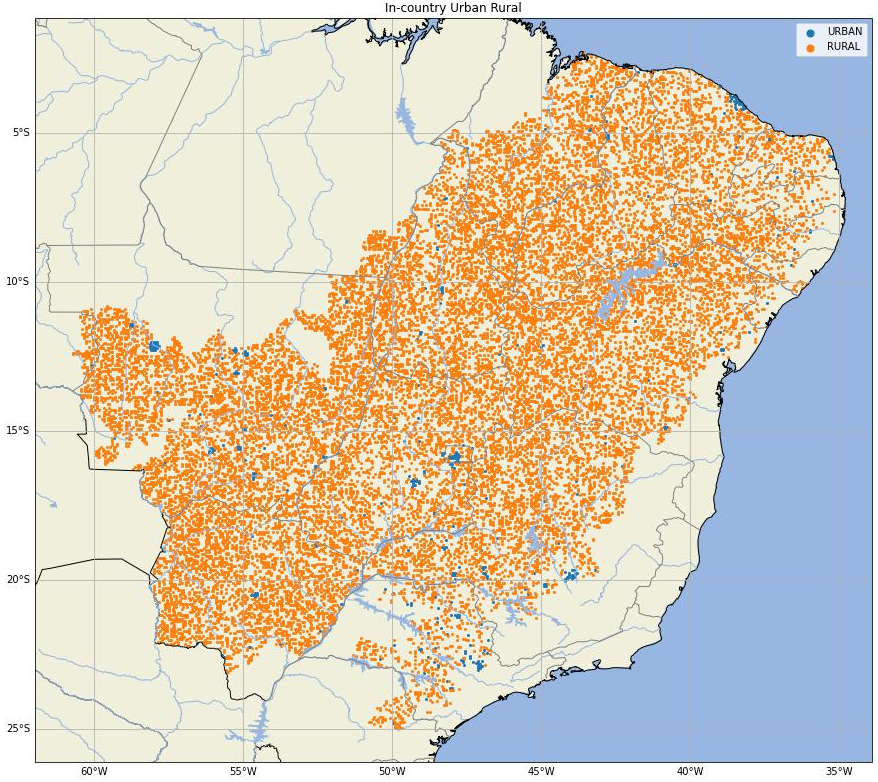

## `country_indices` and `country_labels`

`country_indices` is a dictionary that maps a country name to a sorted `np.array` of its indices
```python
{ 'malawi': np.array([ 8530,  8531,  8532, ..., 10484, 10485, 10486]), ... }
```

`country_labels` is a `np.array` that shows which country each example belongs to
```python
np.array([0, 0, 0, 0, ..., 22, 22, 22])
```
where countries are indexed by their position in `dataset_constants.DHS_COUNTRIES`

In [9]:
country_indices = defaultdict(list)  # country => np.array of indices
country_labels = np.zeros(num_examples, dtype=np.int32)  # np.array of country labels

for i, loc in enumerate(locs):
    country = loc_dict[tuple(loc)]['country']
    country_indices[country].append(i)

for i, country in enumerate(countries):
    country_indices[country] = np.asarray(country_indices[country])
    print(country_indices[country])
    indices = country_indices[country]
    country_labels[indices] = i

country_indices['overall'] = np.arange(num_examples)

[    0     1     2 ... 20435 20436 20437]


# Load saved preds

In [10]:
preds = {}

for model_name, model_dir in MODEL_NAME_TO_DIR.items():
    print(model_name)
    npz_path = os.path.join(LOGS_ROOT_DIR, model_dir, 'test_preds.npz')
    preds[model_name] = load_npz(npz_path)['test_preds']

KNN NL mean scalar
labels: dtype=float32, shape=(20438,)
test_preds: dtype=float32, shape=(20438,)
KNN NL center scalar
labels: dtype=float32, shape=(20438,)
test_preds: dtype=float32, shape=(20438,)
KNN NL hist
labels: dtype=float32, shape=(20438,)
test_preds: dtype=float32, shape=(20438,)
Ridge NL mean scalar
labels: dtype=float32, shape=(20438,)
test_preds: dtype=float32, shape=(20438,)
Ridge NL center scalar
labels: dtype=float32, shape=(20438,)
test_preds: dtype=float32, shape=(20438,)
Ridge RGB hist
labels: dtype=float32, shape=(20438,)
test_preds: dtype=float32, shape=(20438,)
Ridge MS hist
labels: dtype=float32, shape=(20438,)
test_preds: dtype=float32, shape=(20438,)
Ridge NL hist
labels: dtype=float32, shape=(20438,)
test_preds: dtype=float32, shape=(20438,)
Ridge RGB+NL hist
labels: dtype=float32, shape=(20438,)
test_preds: dtype=float32, shape=(20438,)
Ridge MS+NL hist
labels: dtype=float32, shape=(20438,)
test_preds: dtype=float32, shape=(20438,)
Resnet-18 MS
labels: dtype

## Create CSV of all preds

In [11]:
preds_df = pd.DataFrame(
    columns=['lat', 'lon', 'country', 'year', 'urban', 'label'] + MODEL_NAMES)
preds_df['lat'] = locs[:, 0]
preds_df['lon'] = locs[:, 1]
preds_df['label'] = labels
preds_df['year'] = years
preds_df['country'] = np.asarray(countries)[country_labels]
preds_df.loc[:, 'urban'] = False
preds_df.loc[urban_indices, 'urban'] = True

print("All Models Analyzed:")
for model_name in MODEL_NAMES:
    print(model_name)
    preds_df[model_name] = preds[model_name]

preds_df.to_csv(LOGS_ROOT_DIR + 'dhs_incountry_predsnew.csv', index=False)


All Models Analyzed:
KNN NL center scalar
KNN NL hist
KNN NL mean scalar
Resnet-18 MS
Resnet-18 MS+NL concat
Resnet-18 MS_250
Resnet-18 MS_250+NL concat
Resnet-18 NL
Ridge MS hist
Ridge MS+NL hist
Ridge NL center scalar
Ridge NL hist
Ridge NL mean scalar
Ridge RGB hist
Ridge RGB+NL hist


In [12]:
with pd.option_context('display.max_rows', 20):
    display(preds_df)

preds_df.to_csv(LOGS_ROOT_DIR + 'alldata.csv')


,lat,lon,country,year,urban,label,KNN NL center scalar,KNN NL hist,KNN NL mean scalar,Resnet-18 MS,...,Resnet-18 MS_250,Resnet-18 MS_250+NL concat,Resnet-18 NL,Ridge MS hist,Ridge MS+NL hist,Ridge NL center scalar,Ridge NL hist,Ridge NL mean scalar,Ridge RGB hist,Ridge RGB+NL hist
0,-22.890057,-47.071133,brazil,2010,True,0.791217,0.617861,0.500698,0.539117,0.738886,...,0.775849,0.796208,0.516361,0.511793,0.639858,0.831012,0.646669,0.809449,0.462996,0.639846
1,-7.464113,-45.133427,brazil,2010,False,0.221871,0.462906,0.471140,0.471140,0.267705,...,0.315680,0.315429,0.461614,0.346851,0.346303,0.461625,0.462137,0.461575,0.419558,0.419825
2,-20.237682,-48.617920,brazil,2010,False,0.608094,0.482625,0.478275,0.458172,0.630026,...,0.595824,0.589721,0.462932,0.522543,0.517718,0.469392,0.494644,0.467293,0.533381,0.542574
3,-16.556767,-49.227837,brazil,2010,False,0.673652,0.499719,0.511394,0.509060,0.592517,...,0.599142,0.606344,0.500312,0.553153,0.600951,0.472213,0.542706,0.478198,0.553829,0.608467
4,-14.360595,-48.481579,brazil,2010,False,0.515791,0.465482,0.466829,0.456874,0.477428,...,0.462381,0.461014,0.461550,0.537812,0.535631,0.462126,0.469719,0.464199,0.543968,0.544479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20433,-19.891603,-54.431175,brazil,2010,False,0.538998,0.462906,0.446058,0.466546,0.548351,...,0.557291,0.557034,0.461456,0.521707,0.515447,0.461625,0.457923,0.462243,0.497892,0.492032
20434,-12.263503,-57.969074,brazil,2010,True,0.566427,0.462906,0.471140,0.471140,0.473527,...,0.445812,0.446227,0.461456,0.456205,0.454655,0.461625,0.462137,0.461575,0.417658,0.417756
20435,-8.684114,-46.136360,brazil,2010,False,0.357464,0.465557,0.451998,0.453680,0.530846,...,0.521151,0.520708,0.460714,0.542008,0.553456,0.462265,0.462666,0.462209,0.545895,0.541575
20436,-17.457121,-56.392990,brazil,2010,False,0.562519,0.465557,0.451998,0.453680,0.599848,...,0.577816,0.576518,0.460714,0.421092,0.421137,0.462265,0.462666,0.462209,0.423595,0.423508


# Overall MSE, $R^2$, $r^2$, rank-corr

## Individual model results

In [13]:
overall_df = evaluate_df(preds_df, cols=MODEL_NAMES)
overall_df.sort_values(by='r2', ascending=False, inplace=True)
display(overall_df)
overall_df.to_csv(LOGS_ROOT_DIR + 'performance.csv')

,r2,R2,mse,rank
Resnet-18 MS_250+NL concat,0.420496,0.420254,0.014465,0.715505
Resnet-18 MS_250,0.420001,0.419751,0.014477,0.715245
Resnet-18 MS+NL concat,0.414963,0.414203,0.014616,0.711192
Resnet-18 MS,0.414572,0.413783,0.014626,0.710977
Ridge MS+NL hist,0.323902,0.323893,0.016869,0.637316
Ridge MS hist,0.318655,0.318624,0.017001,0.632914
Ridge RGB+NL hist,0.225248,0.225246,0.019330,0.531568
Ridge RGB hist,0.216152,0.216151,0.019557,0.520532
Ridge NL hist,0.012646,0.012634,0.024635,0.062509
KNN NL center scalar,0.009975,0.008367,0.024742,0.054997


Plot Ridge Evaluations 

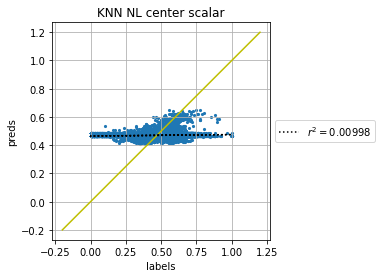

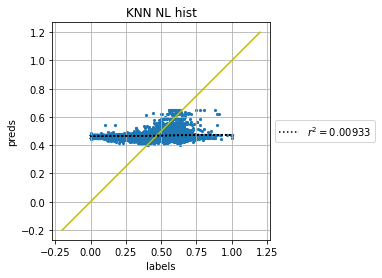

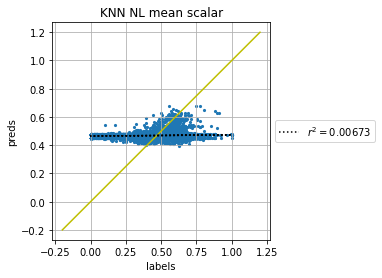

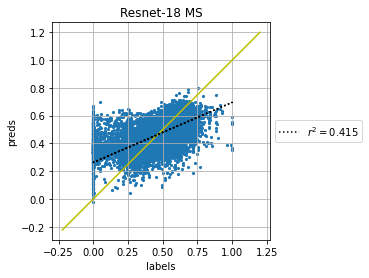

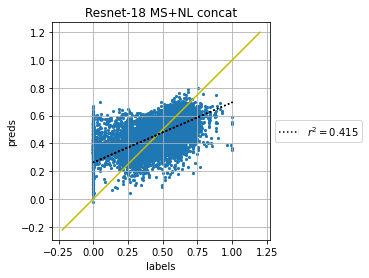

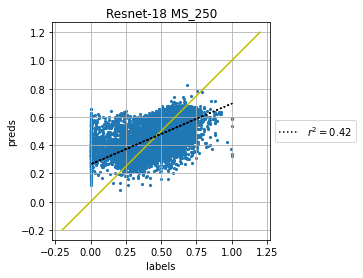

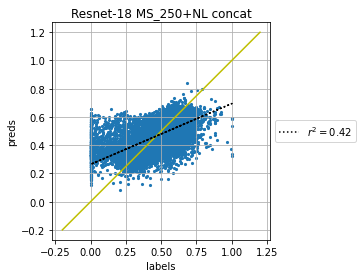

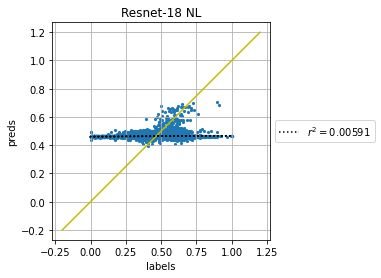

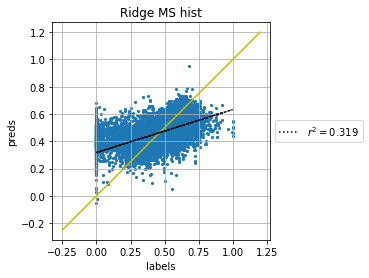

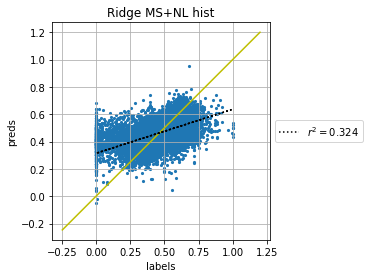

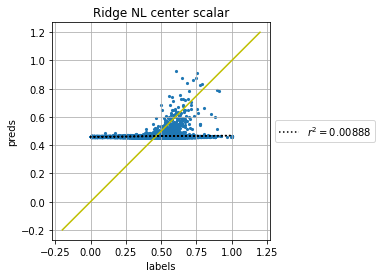

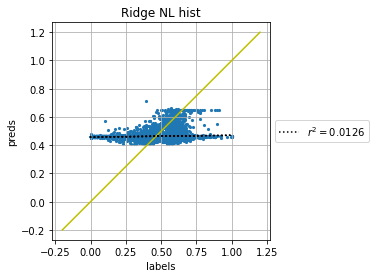

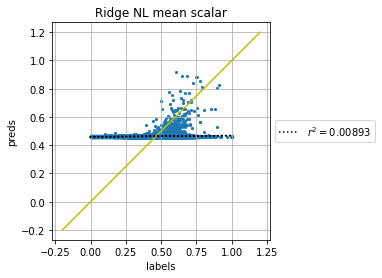

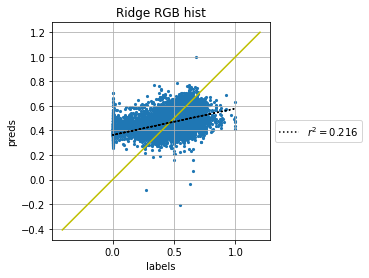

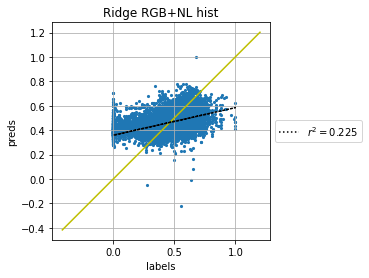

In [14]:
for model_name in MODEL_NAMES:
    model_preds = preds[model_name]
    scatter_preds(
        labels=labels,
        preds=model_preds,
        title=model_name,
        figsize=(4, 4))

# Stopped running the code at this point

## Model Similarity Heatmaps

In [15]:
model_names_by_mse = overall_df.sort_values(by='mse').index
print(model_names_by_mse)
num_models = len(preds)

r2_mat = np.eye(num_models, dtype=np.float64)
rank_mat = np.eye(num_models, dtype=np.float64)

for i, j in itertools.combinations(range(num_models), r=2):
    model_name1 = model_names_by_mse[i]
    model_name2 = model_names_by_mse[j]

    m1_preds = preds[model_name1]
    m2_preds = preds[model_name2]

    r2_mat[i, j] = calc_score(m1_preds, m2_preds, metric='r2')
    rank_mat[i, j] = calc_score(m1_preds, m2_preds, metric='rank')
    r2_mat[j, i] = r2_mat[i, j]
    rank_mat[j, i] = rank_mat[i, j]

Index(['Resnet-18 MS_250+NL concat', 'Resnet-18 MS_250',
       'Resnet-18 MS+NL concat', 'Resnet-18 MS', 'Ridge MS+NL hist',
       'Ridge MS hist', 'Ridge RGB+NL hist', 'Ridge RGB hist', 'Ridge NL hist',
       'Ridge NL mean scalar', 'Ridge NL center scalar',
       'KNN NL center scalar', 'KNN NL hist', 'Resnet-18 NL',
       'KNN NL mean scalar'],
      dtype='object')


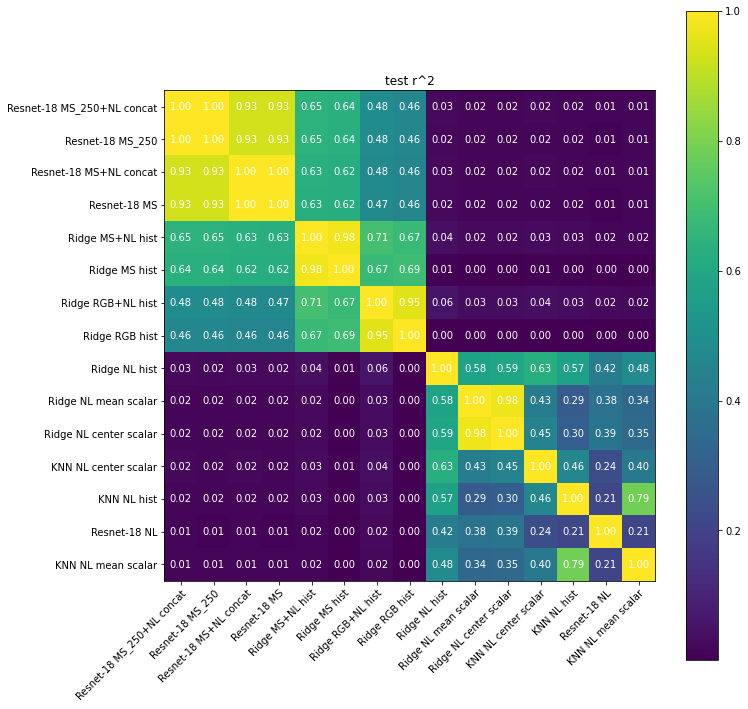

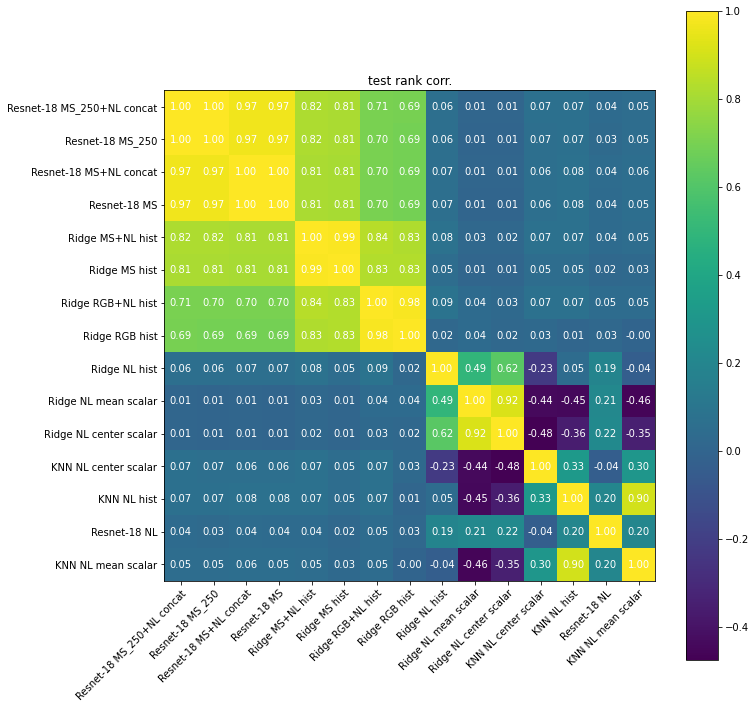

In [16]:
symmetric_heatmap(r2_mat, labels=model_names_by_mse, format_spec='{:.2f}', title='test r^2')
symmetric_heatmap(rank_mat, labels=model_names_by_mse, format_spec='{:.2f}', title='test rank corr.')

## Cumulative analysis

In [17]:
ridge_model_indices, ridge_model_names = [], []
resnet_model_indices, resnet_model_names = [], []

for i, model_name in enumerate(model_names_by_mse):
    if 'Resnet' not in model_name:
        ridge_model_indices.append(i)
        ridge_model_names.append(model_name)
    elif 'Resnet' in model_name:
        resnet_model_indices.append(i)
        resnet_model_names.append(model_name)

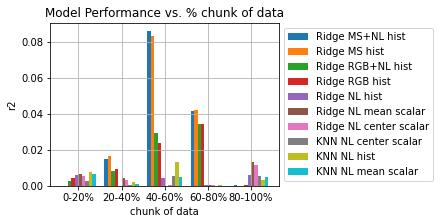

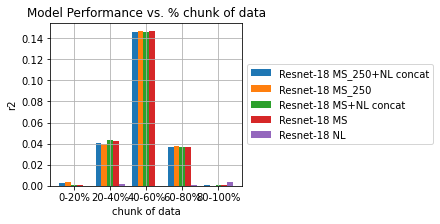

In [18]:
chunk_r2s = np.zeros([len(model_names_by_mse), 5])
for i, model_name in enumerate(model_names_by_mse):
    chunk_r2s[i, :] = chunk_vs_score(preds=preds[model_name], labels=labels, nchunks=5, metric='r2')

plot_chunk_vs_score(scores=chunk_r2s[ridge_model_indices], figsize=(6, 3),
                    legends=ridge_model_names, metric='r2')

plot_chunk_vs_score(scores=chunk_r2s[resnet_model_indices], figsize=(6, 3),
                    legends=resnet_model_names, metric='r2')

# Break-down by country, urban/rural

Tables with model Evaluation split for Urban/Rural Clusters

In [40]:
country_df = (
    preds_df
    .groupby('country')
    .apply(evaluate_df, cols=MODEL_NAMES, index_name='model'))

country_urban_df = (
    preds_df
    .groupby(['country', 'urban'])
    .apply(evaluate_df, cols=MODEL_NAMES, index_name='model'))

country_df.sort_values(by='r2', ascending=False, inplace=True)

with pd.option_context('display.precision', 3):
    display(country_df)
    display(country_urban_df)
    
    
country_df.to_csv('/root/logs/income/country.csv')

country_urban_df.to_csv('/root/logs/income/country_urban.csv')


r2     R2    mse       rank
country model                                                     
brazil  Resnet-18 MS_250+NL concat  0.420  0.420  0.014  7.155e-01
        Resnet-18 MS_250            0.420  0.420  0.014  7.152e-01
        Resnet-18 MS+NL concat      0.415  0.414  0.015  7.112e-01
        Resnet-18 MS                0.415  0.414  0.015  7.110e-01
        Ridge MS+NL hist            0.324  0.324  0.017  6.373e-01
        Ridge MS hist               0.319  0.319  0.017  6.329e-01
        Ridge RGB+NL hist           0.225  0.225  0.019  5.316e-01
        Ridge RGB hist              0.216  0.216  0.020  5.205e-01
        Ridge NL hist               0.013  0.013  0.025  6.251e-02
        KNN NL center scalar        0.010  0.008  0.025  5.500e-02
        KNN NL hist                 0.009  0.008  0.025  7.183e-02
        Ridge NL mean scalar        0.009  0.009  0.025 -8.155e-03
        Ridge NL center scalar      0.009  0.009  0.025  9.169e-04
        KNN NL mean scalar          0.007  0.005  0.025  5.620e-02
        Resnet-18 NL                0.006  0.006  0.025  2.300e-02

r2         R2    mse   rank
country urban model                                                         
brazil  False KNN NL center scalar        9.394e-04 -2.151e-03  0.025  0.033
              KNN NL hist                 1.742e-03 -6.766e-04  0.025  0.050
              KNN NL mean scalar          3.997e-04 -3.666e-03  0.025  0.035
              Resnet-18 MS                4.114e-01  4.108e-01  0.015  0.708
              Resnet-18 MS+NL concat      4.116e-01  4.110e-01  0.015  0.708
              Resnet-18 MS_250            4.169e-01  4.167e-01  0.015  0.713
              Resnet-18 MS_250+NL concat  4.171e-01  4.170e-01  0.015  0.713
              Resnet-18 NL                2.937e-04 -1.221e-04  0.025  0.002
              Ridge MS hist               3.180e-01  3.179e-01  0.017  0.631
              Ridge MS+NL hist            3.191e-01  3.191e-01  0.017  0.633
              Ridge NL center scalar      2.169e-05 -5.662e-05  0.025 -0.024
              Ridge NL hist               2.438e-03  2.428e-03  0.025  0.040
              Ridge NL mean scalar        1.981e-04  1.574e-04  0.025 -0.034
              Ridge RGB hist              2.171e-01  2.170e-01  0.020  0.519
              Ridge RGB+NL hist           2.192e-01  2.192e-01  0.020  0.524
        True  KNN NL center scalar        1.775e-01  8.814e-02  0.009  0.433
              KNN NL hist                 9.568e-02 -9.512e-02  0.010  0.288
              KNN NL mean scalar          1.151e-01 -1.022e-01  0.011  0.324
              Resnet-18 MS                2.434e-01  7.511e-02  0.009  0.605
              Resnet-18 MS+NL concat      2.515e-01  9.417e-02  0.009  0.612
              Resnet-18 MS_250            2.499e-01  9.338e-02  0.009  0.610
              Resnet-18 MS_250+NL concat  2.637e-01  1.241e-01  0.008  0.625
              Resnet-18 NL                4.450e-02 -4.559e-01  0.014  0.174
              Ridge MS hist               6.153e-02 -4.049e-01  0.013  0.308
              Ridge MS+NL hist            2.069e-01  9.455e-02  0.009  0.533
              Ridge NL center scalar      2.132e-01 -1.002e-01  0.010  0.444
              Ridge NL hist               1.504e-01  5.993e-02  0.009  0.377
              Ridge NL mean scalar        2.177e-01 -1.202e-01  0.011  0.445
              Ridge RGB hist              1.799e-02 -8.223e-01  0.017  0.248
              Ridge RGB+NL hist           1.932e-01  3.083e-02  0.009  0.540

# Break-down by country-year, urban/rural

In [41]:
countryyear_df = (
    preds_df
    .groupby(['country', 'year'])
    .apply(evaluate_df, cols=MODEL_NAMES, index_name='model'))
countryyear_urban_df = (
    preds_df
    .groupby(['country', 'year', 'urban'])
    .apply(evaluate_df, cols=MODEL_NAMES, index_name='model'))

with pd.option_context('display.precision', 3):
    display(countryyear_df)
    display(countryyear_urban_df)

r2     R2    mse       rank
country year model                                                     
brazil  2010 KNN NL center scalar        0.010  0.008  0.025  5.500e-02
             KNN NL hist                 0.009  0.008  0.025  7.183e-02
             KNN NL mean scalar          0.007  0.005  0.025  5.620e-02
             Resnet-18 MS                0.415  0.414  0.015  7.110e-01
             Resnet-18 MS+NL concat      0.415  0.414  0.015  7.112e-01
             Resnet-18 MS_250            0.420  0.420  0.014  7.152e-01
             Resnet-18 MS_250+NL concat  0.420  0.420  0.014  7.155e-01
             Resnet-18 NL                0.006  0.006  0.025  2.300e-02
             Ridge MS hist               0.319  0.319  0.017  6.329e-01
             Ridge MS+NL hist            0.324  0.324  0.017  6.373e-01
             Ridge NL center scalar      0.009  0.009  0.025  9.169e-04
             Ridge NL hist               0.013  0.013  0.025  6.251e-02
             Ridge NL mean scalar        0.009  0.009  0.025 -8.155e-03
             Ridge RGB hist              0.216  0.216  0.020  5.205e-01
             Ridge RGB+NL hist           0.225  0.225  0.019  5.316e-01

r2         R2    mse  \
country year urban model                                                     
brazil  2010 False KNN NL center scalar        9.394e-04 -2.151e-03  0.025   
                   KNN NL hist                 1.742e-03 -6.766e-04  0.025   
                   KNN NL mean scalar          3.997e-04 -3.666e-03  0.025   
                   Resnet-18 MS                4.114e-01  4.108e-01  0.015   
                   Resnet-18 MS+NL concat      4.116e-01  4.110e-01  0.015   
                   Resnet-18 MS_250            4.169e-01  4.167e-01  0.015   
                   Resnet-18 MS_250+NL concat  4.171e-01  4.170e-01  0.015   
                   Resnet-18 NL                2.937e-04 -1.221e-04  0.025   
                   Ridge MS hist               3.180e-01  3.179e-01  0.017   
                   Ridge MS+NL hist            3.191e-01  3.191e-01  0.017   
                   Ridge NL center scalar      2.169e-05 -5.662e-05  0.025   
                   Ridge NL hist               2.438e-03  2.428e-03  0.025   
                   Ridge NL mean scalar        1.981e-04  1.574e-04  0.025   
                   Ridge RGB hist              2.171e-01  2.170e-01  0.020   
                   Ridge RGB+NL hist           2.192e-01  2.192e-01  0.020   
             True  KNN NL center scalar        1.775e-01  8.814e-02  0.009   
                   KNN NL hist                 9.568e-02 -9.512e-02  0.010   
                   KNN NL mean scalar          1.151e-01 -1.022e-01  0.011   
                   Resnet-18 MS                2.434e-01  7.511e-02  0.009   
                   Resnet-18 MS+NL concat      2.515e-01  9.417e-02  0.009   
                   Resnet-18 MS_250            2.499e-01  9.338e-02  0.009   
                   Resnet-18 MS_250+NL concat  2.637e-01  1.241e-01  0.008   
                   Resnet-18 NL                4.450e-02 -4.559e-01  0.014   
                   Ridge MS hist               6.153e-02 -4.049e-01  0.013   
                   Ridge MS+NL hist            2.069e-01  9.455e-02  0.009   
                   Ridge NL center scalar      2.132e-01 -1.002e-01  0.010   
                   Ridge NL hist               1.504e-01  5.993e-02  0.009   
                   Ridge NL mean scalar        2.177e-01 -1.202e-01  0.011   
                   Ridge RGB hist              1.799e-02 -8.223e-01  0.017   
                   Ridge RGB+NL hist           1.932e-01  3.083e-02  0.009   

                                                rank  
country year urban model                              
brazil  2010 False KNN NL center scalar        0.033  
                   KNN NL hist                 0.050  
                   KNN NL mean scalar          0.035  
                   Resnet-18 MS                0.708  
                   Resnet-18 MS+NL concat      0.708  
                   Resnet-18 MS_250            0.713  
                   Resnet-18 MS_250+NL concat  0.713  
                   Resnet-18 NL                0.002  
                   Ridge MS hist               0.631  
                   Ridge MS+NL hist            0.633  
                   Ridge NL center scalar     -0.024  
                   Ridge NL hist               0.040  
                   Ridge NL mean scalar       -0.034  
                   Ridge RGB hist              0.519  
                   Ridge RGB+NL hist           0.524  
             True  KNN NL center scalar        0.433  
                   KNN NL hist                 0.288  
                   KNN NL mean scalar          0.324  
                   Resnet-18 MS                0.605  
                   Resnet-18 MS+NL concat      0.612  
                   Resnet-18 MS_250            0.610  
                   Resnet-18 MS_250+NL concat  0.625  
                   Resnet-18 NL                0.174  
                   Ridge MS hist               0.308  
                   Ridge MS+NL hist            0.533  
                   Ridge NL center scalar      0.444  
                 

# Urban/rural

DataFrame with model evaluation split by Cluster Types

In [23]:
urban_rural_df = (
    preds_df
    .groupby('urban')
    .apply(evaluate_df, cols=MODEL_NAMES, index_name='model')
    .unstack('urban'))

with pd.option_context('display.max_rows', 20, 'display.precision', 3):
    display(urban_rural_df)

r2                R2           mse         \
urban                           False  True       False  True   False  True    
model                                                                          
KNN NL center scalar        9.394e-04  0.177 -2.151e-03  0.088  0.025  0.009   
KNN NL hist                 1.742e-03  0.096 -6.766e-04 -0.095  0.025  0.010   
KNN NL mean scalar          3.997e-04  0.115 -3.666e-03 -0.102  0.025  0.011   
Resnet-18 MS                4.114e-01  0.243  4.108e-01  0.075  0.015  0.009   
Resnet-18 MS+NL concat      4.116e-01  0.252  4.110e-01  0.094  0.015  0.009   
Resnet-18 MS_250            4.169e-01  0.250  4.167e-01  0.093  0.015  0.009   
Resnet-18 MS_250+NL concat  4.171e-01  0.264  4.170e-01  0.124  0.015  0.008   
Resnet-18 NL                2.937e-04  0.045 -1.221e-04 -0.456  0.025  0.014   
Ridge MS hist               3.180e-01  0.062  3.179e-01 -0.405  0.017  0.013   
Ridge MS+NL hist            3.191e-01  0.207  3.191e-01  0.095  0.017  0.009   
Ridge NL center scalar      2.169e-05  0.213 -5.662e-05 -0.100  0.025  0.010   
Ridge NL hist               2.438e-03  0.150  2.428e-03  0.060  0.025  0.009   
Ridge NL mean scalar        1.981e-04  0.218  1.574e-04 -0.120  0.025  0.011   
Ridge RGB hist              2.171e-01  0.018  2.170e-01 -0.822  0.020  0.017   
Ridge RGB+NL hist           2.192e-01  0.193  2.192e-01  0.031  0.020  0.009   

                             rank         
urban                       False  True   
model                                     
KNN NL center scalar        0.033  0.433  
KNN NL hist                 0.050  0.288  
KNN NL mean scalar          0.035  0.324  
Resnet-18 MS                0.708  0.605  
Resnet-18 MS+NL concat      0.708  0.612  
Resnet-18 MS_250            0.713  0.610  
Resnet-18 MS_250+NL concat  0.713  0.625  
Resnet-18 NL                0.002  0.174  
Ridge MS hist               0.631  0.308  
Ridge MS+NL hist            0.633  0.533  
Ridge NL center scalar     -0.024  0.444  
Ridge NL hist               0.040  0.377  
Ridge NL mean scalar       -0.034  0.445  
Ridge RGB hist              0.519  0.248  
Ridge RGB+NL hist           0.524  0.540

Histogram with model evaluation (r2 or Squared pearson correlation coeficcient) split by Cluster Types

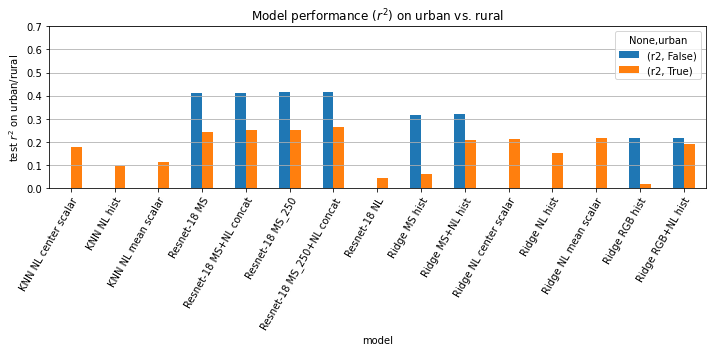

In [24]:
ax = urban_rural_df.loc[:, ('r2', slice(None))].plot(
    kind='bar', figsize=[10, 5])
ax.set_ylabel('test $r^2$ on urban/rural')
ax.set_ylim(bottom=0, top=0.7)
ax.set_title('Model performance ($r^2$) on urban vs. rural')
ax.grid(True, axis='y')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=60, ha='right',
         rotation_mode='anchor')
plt.tight_layout()
plt.show()

Histogram with model evaluation (R2 or coefficient of determination) split by Cluster Types

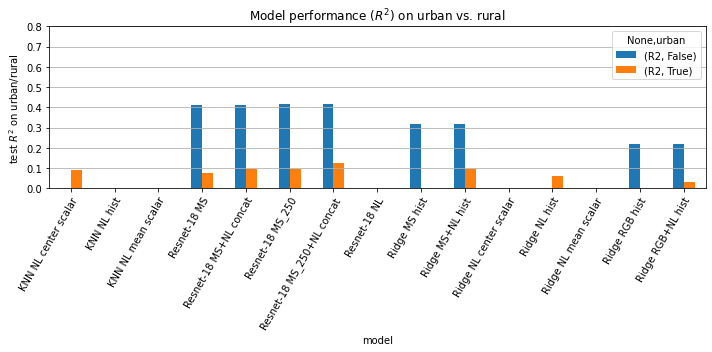

In [38]:
ax = urban_rural_df.loc[:, ('R2', slice(None))].plot(
    kind='bar', figsize=[10, 5])
ax.set_ylabel('test $R^2$ on urban/rural')
ax.set_ylim(bottom=0, top=0.8)
ax.set_title('Model performance ($R^2$) on urban vs. rural')
ax.grid(True, axis='y')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=60, ha='right',
         rotation_mode='anchor')
plt.tight_layout()
plt.show()

Plot Ridge Evaluations split by Cluster Type

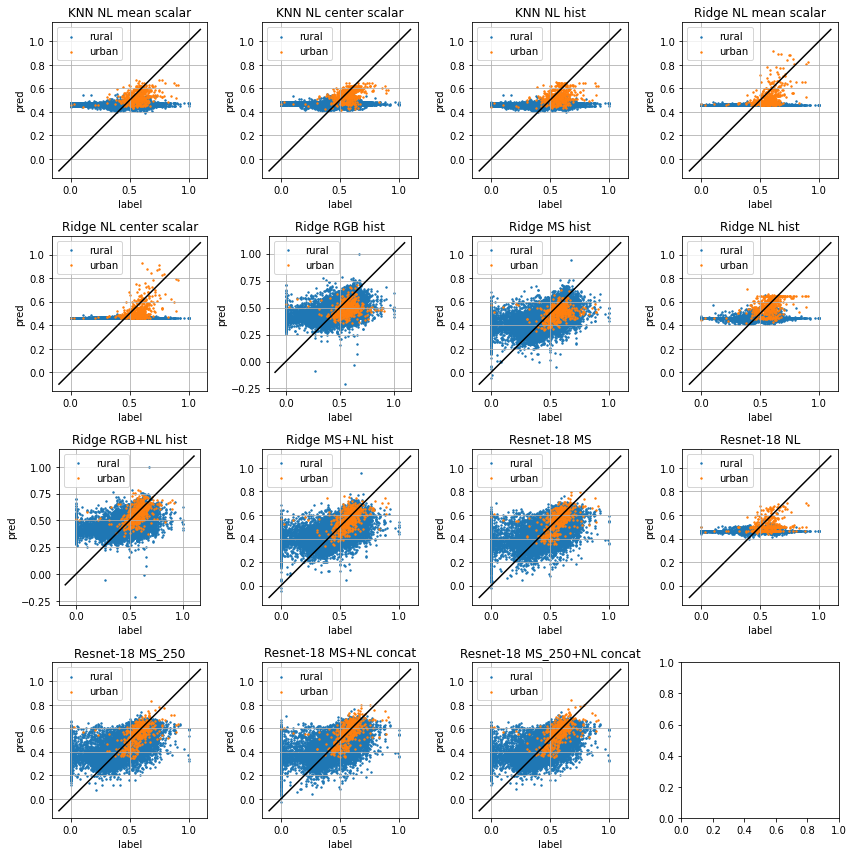

In [44]:
def plot_urban_rural_predictions(labels, preds, urban_indices, rural_indices):
    '''
    Args
    - labels: np.array, shape [N]
    - preds: dict, model_name => np.array, shape [N]
    - urban_indices: np.array, shape [num_urban]
    - rural_indices: np.array, shape [num_rural]
    '''
    nrows = int(np.ceil(np.sqrt(len(preds))))
    ncols = int(np.ceil(len(preds) / nrows))
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                            sharey=False, sharex=False, figsize=[ncols*3, nrows*3])
    for model_name, ax in zip(preds, axs.flat):
        ax.scatter(
            x=labels[rural_indices],
            y=preds[model_name][rural_indices],
            s=2, label='rural')
        ax.scatter(
            x=labels[urban_indices],
            y=preds[model_name][urban_indices],
            s=2, label='urban')
        ax.grid(True)
        ax.set_aspect('equal')
        ax.set(xlabel='label', ylabel='pred', title=model_name)
        xy_line = np.array([-0.1,1.1])
        ax.plot(xy_line, xy_line, color='black')
        ax.legend()
    fig.tight_layout()
    plt.show()

plot_urban_rural_predictions(labels, preds, urban_indices, rural_indices)

# Model performance as function of NL

## When NL = 0

In [27]:
from batchers.batcher import MEANS_DICT, STD_DEVS_DICT

dmsp0 = (0.0 - MEANS_DICT[DATASET_NAME]['DMSP']) / STD_DEVS_DICT[DATASET_NAME]['DMSP']


print('DMSP 0-value (after normalization):', dmsp0)


dmsp0_indices = (years < 2012) & (nls_mean == dmsp0)

nl0_indices = dmsp0_indices 

assert np.all(nls_mean[nl0_indices] == dmsp0)
assert np.all(nls_center[nl0_indices] == dmsp0)


DMSP 0-value (after normalization): -0.11164771200632632


In [28]:
print('# of locs w/ DMSP=0:', np.sum(dmsp0_indices))
print('# of locs w/ NL=0:', np.sum(nl0_indices))

# of locs w/ DMSP=0: 16046
# of locs w/ NL=0: 16046


Because we train a separate ridge regression model for each left-out test country, we get many different predictions for when NL = 0.

### Plot Ridge Evaluations split by Cluster Type

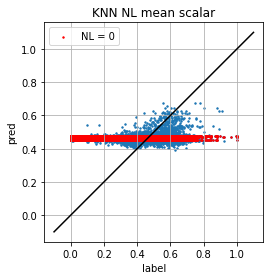

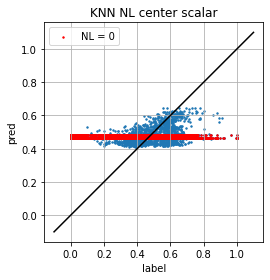

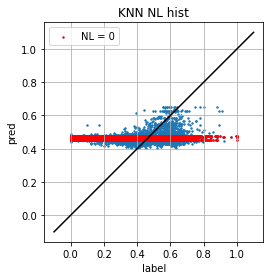

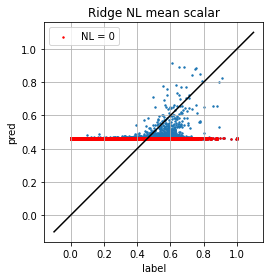

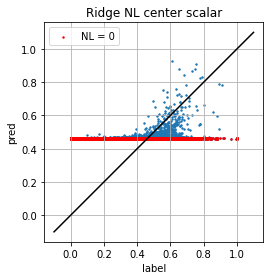

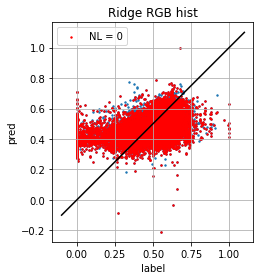

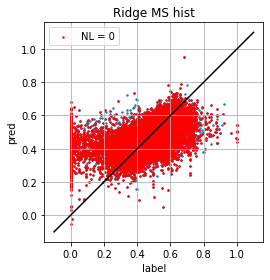

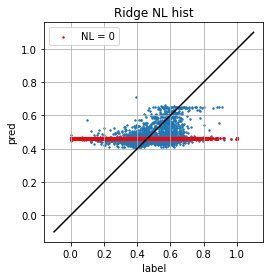

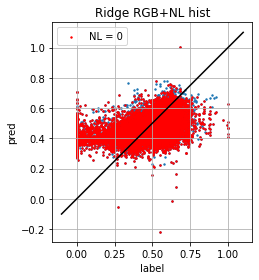

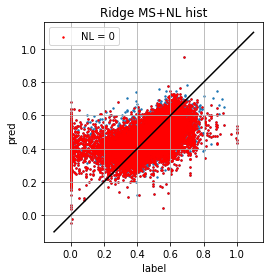

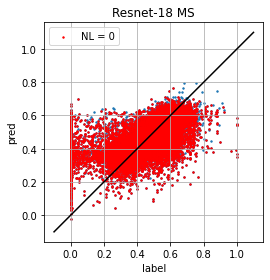

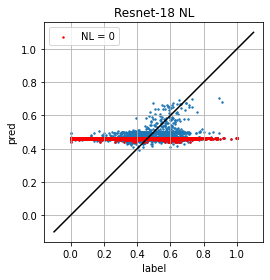

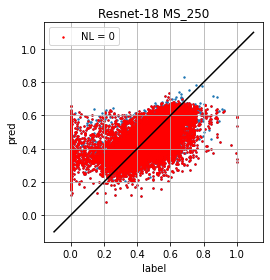

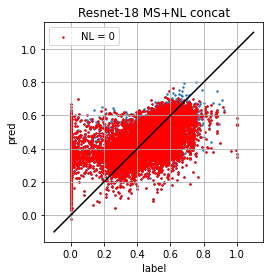

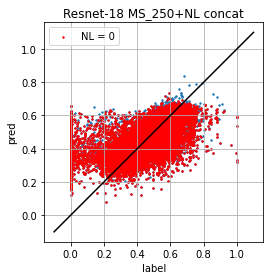

In [30]:
def plot_preds_nl0(model_name, labels, preds, nl0_indices):
    '''
    Args
    - model_name: str
    - labels: np.array, shape [num_examples]
    - preds: np.array, shape [num_examples]
    - nl0_indices: np.array, integer indices into labels/preds
    '''
    fig, ax = plt.subplots(1, 1, figsize=[4, 4])
    ax.scatter(x=labels, y=preds, s=2)
    ax.scatter(x=labels[nl0_indices], y=preds[nl0_indices], c='red', s=2, label='NL = 0')
    ax.set(xlabel='label', ylabel='pred', title=model_name)
    ax.grid(True)
    ax.set_aspect('equal')
    xy_line = np.array([-0.1, 1.1])
    ax.plot(xy_line, xy_line, color='black')
    ax.legend()
    fig.tight_layout()
    plt.show()

for model_name in MODEL_NAME_TO_DIR:
    plot_preds_nl0(model_name, labels, preds[model_name], nl0_indices)

### DataFrame with model evaluation split by Cluster Types

In [37]:
nl0_df = evaluate_df(preds_df.loc[nl0_indices, :], cols=MODEL_NAMES)
nl0_df.sort_values('r2', ascending=False, inplace=True)
nl0_df.to_csv('/root/logs/income/performance_without_nl.csv')
with pd.option_context('display.max_rows', 20, 'display.precision', 5):
    display(nl0_df)

,r2,R2,mse,rank
Resnet-18 MS_250+NL concat,4.01095e-01,0.40107,0.01646,0.69909
Resnet-18 MS_250,4.00950e-01,0.40087,0.01647,0.69898
Resnet-18 MS+NL concat,3.94980e-01,0.39476,0.01664,0.69467
Resnet-18 MS,3.94886e-01,0.39461,0.01664,0.69465
Ridge MS+NL hist,3.06980e-01,0.30646,0.01906,0.62028
Ridge MS hist,3.04876e-01,0.30447,0.01912,0.61814
Ridge RGB+NL hist,2.03799e-01,0.20360,0.02189,0.50644
Ridge RGB hist,2.03359e-01,0.20323,0.02190,0.50605
Ridge NL hist,2.79794e-04,-0.00014,0.02749,-0.01703
Ridge NL center scalar,2.75632e-04,-0.00013,0.02749,-0.01703


## Target vs. NL mean

In [43]:
def plot_label_v_nl(label, preds, nl_means):
    '''
    Args
    - model_name: str
    - preds: np.array
    - nl_means: np.array
    '''
    fig, ax = plt.subplots(1, 1, figsize=[5, 5])
    ax.scatter(
            x=nl_means[rural_indices],
            y=preds[rural_indices],
            s=2, label='rural')
    ax.scatter(
            x=nl_means[urban_indices],
            y=preds[urban_indices],
            s=2, label='urban')
    
    ax.set_title(label)
    ax.set_xlabel('Mean NL of Image (std dev from mean)')
    ax.set_ylabel(f'{label} Indicator')
    ax.grid(True)
    fig.tight_layout()
    plt.legend(['rural','urban'])
    plt.show()

Plot the Target indicator in function of the Mean NL Value of the Image

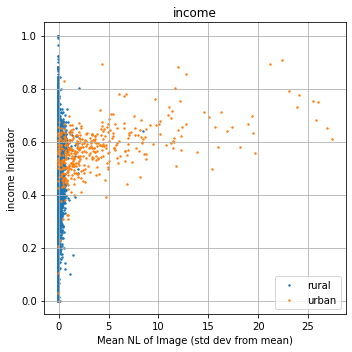

<Figure size 432x288 with 0 Axes>

In [44]:
plot_label_v_nl(label, labels, nls_mean)
plt.savefig("income_mean_NL")

## Predictions vs. NL mean

In [45]:
def plot_preds_v_nl(model_name, preds, nl_means):
    '''
    Args
    - model_name: str
    - preds: np.array
    - nl_means: np.array
    '''
    fig, ax = plt.subplots(1, 1, figsize=[5, 5])
    ax.scatter(
            x=nl_means[rural_indices],
            y=preds[rural_indices],
            s=2, label='rural')
    ax.scatter(
            x=nl_means[urban_indices],
            y=preds[urban_indices],
            s=2, label='urban')
    
    ax.set_title(model_name)
    ax.set_xlabel('Mean NL of Image (std dev from mean)')
    ax.set_ylabel('Predicted Income')
    ax.grid(True)
    fig.tight_layout()
    plt.legend(['rural','urban'])
    plt.show()

def plot_residuals_v_nl(model_name, preds, labels, nl_means):
    '''
    Args
    - model_name: str
    - preds: np.array
    - labels: np.array
    - nl_means: np.array
    '''
    residuals = labels - preds
    fig, ax = plt.subplots(1, 1, figsize=[5, 5])
    ax.scatter(x=nl_means, y=residuals, s=3)
    ax.set_title(model_name)
    ax.set_xlabel('Mean NL of Image (std dev from mean)')
    ax.set_ylabel('Residual (label - pred)')
    ax.grid(True)
    fig.tight_layout()
    plt.show()

For each model, plots the predicted indicator in function of the Mean NL Value of the Image

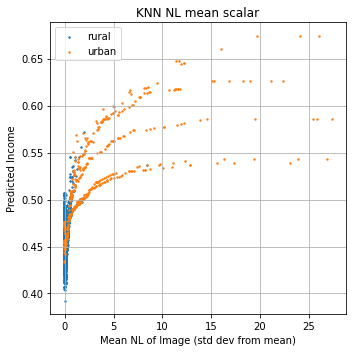

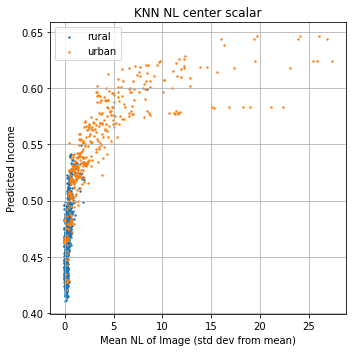

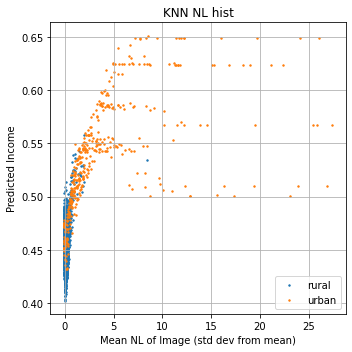

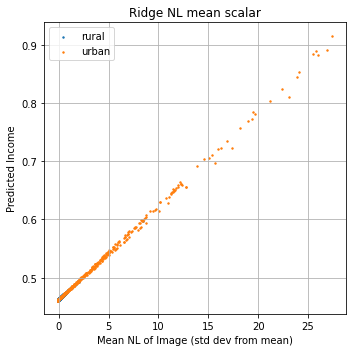

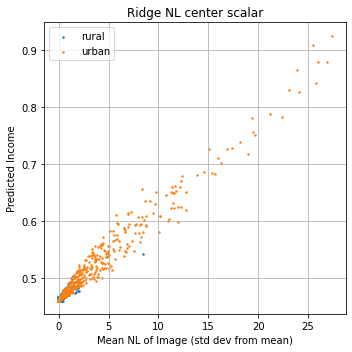

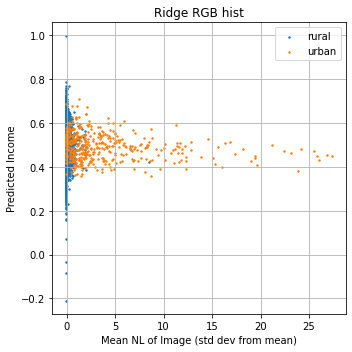

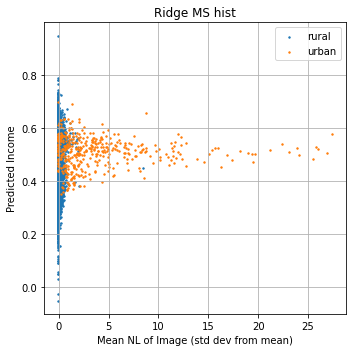

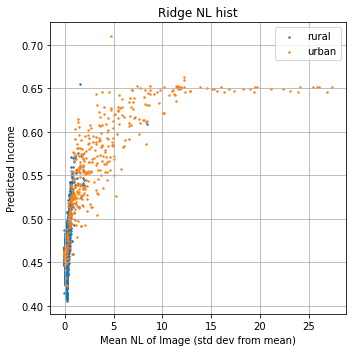

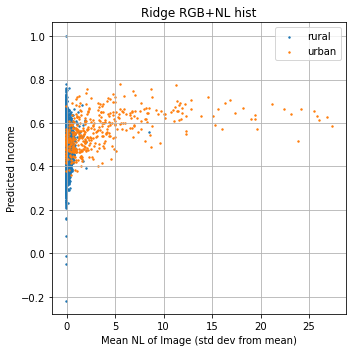

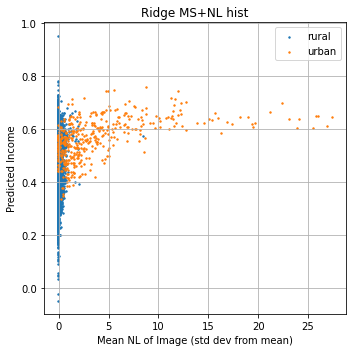

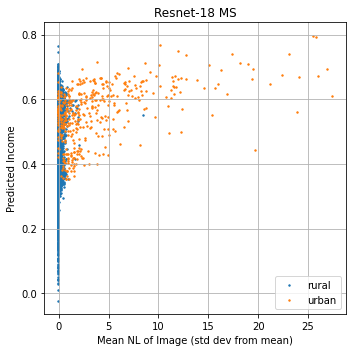

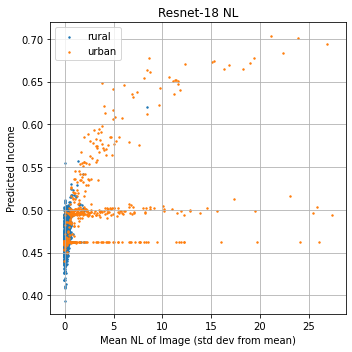

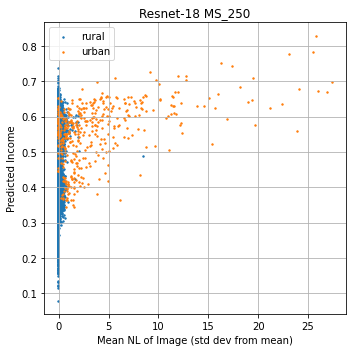

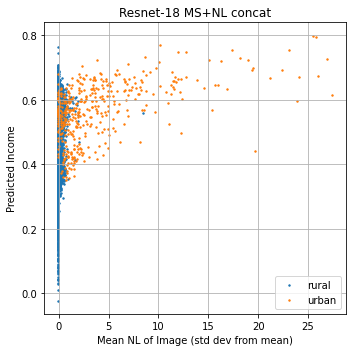

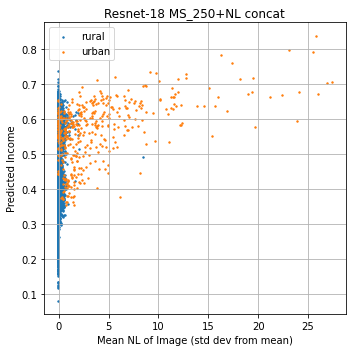

In [46]:
for model_name in MODEL_NAME_TO_DIR:
    plot_preds_v_nl(model_name, preds[model_name], nls_mean)